**PROJECT-DICODING**

**RECOMMENDATION SYSTEM**

**FAISHAL ANWAR HASYIM**

## Import Library yang dibutuhkan
## Impor Pustaka
 Dalam sel ini, kita mengimpor semua pustaka yang diperlukan untuk membangun sistem rekomendasi.
 Pustaka yang digunakan meliputi:

 - `pandas`: Untuk manipulasi dan analisis data.
    Contohnya, dapat digunakan untuk mengimpor dataset, melakukan agregasi, dan memanipulasi DataFrame.
 - `numpy`: Untuk operasi numerik dan penanganan array.
    Memungkinkan pengolahan data multidimensi yang efisien dan dukungan untuk operasi matematika.
 - `neattext`: Untuk fungsi pemrosesan teks, khususnya untuk membersihkan dan memproses data teks.
    Berguna untuk melakukan normalisasi teks, penghapusan tanda baca, dan preprocessing lainnya.
 - `scipy`: Untuk operasi matriks jarang, yang penting untuk menangani dataset besar secara efisien.
    Menyediakan beragam fungsi matematis dan algoritma untuk optimasi dan statistik.
 - `sklearn`: Untuk algoritma pembelajaran mesin, termasuk Nearest Neighbors dan teknik vektorisasi.
    Memiliki berbagai fungsi, termasuk untuk membagi dataset, menghitung akurasi, dan melakukan proses klasifikasi.
 - `matplotlib` dan `seaborn`: Untuk visualisasi data guna membantu memahami data dengan lebih baik.
    `matplotlib` menyediakan antarmuka dasar untuk membuat berbagai jenis plot, sedangkan `seaborn` menawarkan antarmuka yang lebih sederhana
     dan estetis untuk visualisasi data.

In [2]:
# Menginstall package neattext
!pip install neattext

# Mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import neattext.functions as nfx

## 1. Data Understanding
Pada bagian ini, kita akan menjelajahi dataset yang merupakan bagian dari sistem rekomendasi. Dataset yang digunakan meliputi:

* movies.csv: Berisi informasi tentang film, seperti judul, tahun rilis, dan genre.
* links.csv: Berisi tautan ke film, mungkin ke platform seperti IMDb.
* tags.csv: Berisi tag yang dihasilkan pengguna untuk film tertentu.
* ratings.csv: Berisi penilaian pengguna untuk film, termasuk ID pengguna dan penilaian yang diberikan.

Data ini bersumber dari Kaggle, dan kita akan mencetak jumlah entri unik dalam setiap dataset untuk memahami cakupan data kita.
File bisa diunduh di : https://www.kaggle.com/datasets/kanametov/movies-recomendation-system




In [3]:
movies = pd.read_csv('/content/movies.csv')
links = pd.read_csv('/content/links.csv')
tags = pd.read_csv('/content/tags.csv')
ratings = pd.read_csv('/content/ratings.csv')

print('Jumlah data film yang tersedia: ', len(movies.movieId.unique()))
print('Jumlah data link film: ', len(links.movieId.unique()))
print('Jumlah data tag film: ', len(tags.movieId.unique()))
print('Jumlah data rating film: ', len(ratings.userId.unique()))

Jumlah data film yang tersedia:  34208
Jumlah data link film:  34208
Jumlah data tag film:  21654
Jumlah data rating film:  247753


Di sini, kita membaca empat file CSV yang berbeda menggunakan pd.read_csv(). Setiap file CSV berisi data yang berbeda:

- movies.csv: Berisi informasi tentang film, seperti judul, tahun rilis, dan genre.

- links.csv: Berisi informasi tentang link film, kemungkinan ke platform IMDb.

- tags.csv: Berisi tag atau label yang diberikan oleh pengguna untuk film tertentu.

- ratings.csv: Berisi data rating yang diberikan oleh pengguna untuk film, termasuk userId dan rating yang diberikan.

selanjutnya, kita print jumlah dari masing masing data

In [4]:
movies # kode ini akan melihat isi dari variabel movies yang sebelumnya kita baca menggunakan pd.read_csv

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
34203,151697,Grand Slam (1967),Thriller
34204,151701,Bloodmoney (2010),(no genres listed)
34205,151703,The Butterfly Circus (2009),Drama
34206,151709,Zero (2015),Drama|Sci-Fi


In [5]:
movies.info() # kode ini akan melihat detail dari variabel movies seperti tipe data dan sebagainya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  34208 non-null  int64 
 1   title    34208 non-null  object
 2   genres   34208 non-null  object
dtypes: int64(1), object(2)
memory usage: 801.9+ KB


Kita memeriksa struktur dataset movies, termasuk tipe data dan jumlah film serta genre unik yang tersedia.

In [6]:
# kode ini ditujukan untuk melihat berapa movies pada dataset movies dengan jenis yang berbeda (duplikat tidak dihitung)
print('Banyak data movie: ', len(movies.movieId.unique()))

# Melihat isi Genre
print('Genre movie: ', movies.genres.unique())

Banyak data movie:  34208
Genre movie:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' ...
 'Action|Comedy|Romance|Sci-Fi|Thriller' 'Action|Animation|Romance'
 'Action|Adventure|Thriller|Western']


Kita membuat plot batang untuk memvisualisasikan frekuensi berbagai genre film. Ini membantu kita memahami genre mana yang paling populer di antara pengguna dan dapat memberikan wawasan untuk rekomendasi yang lebih baik.

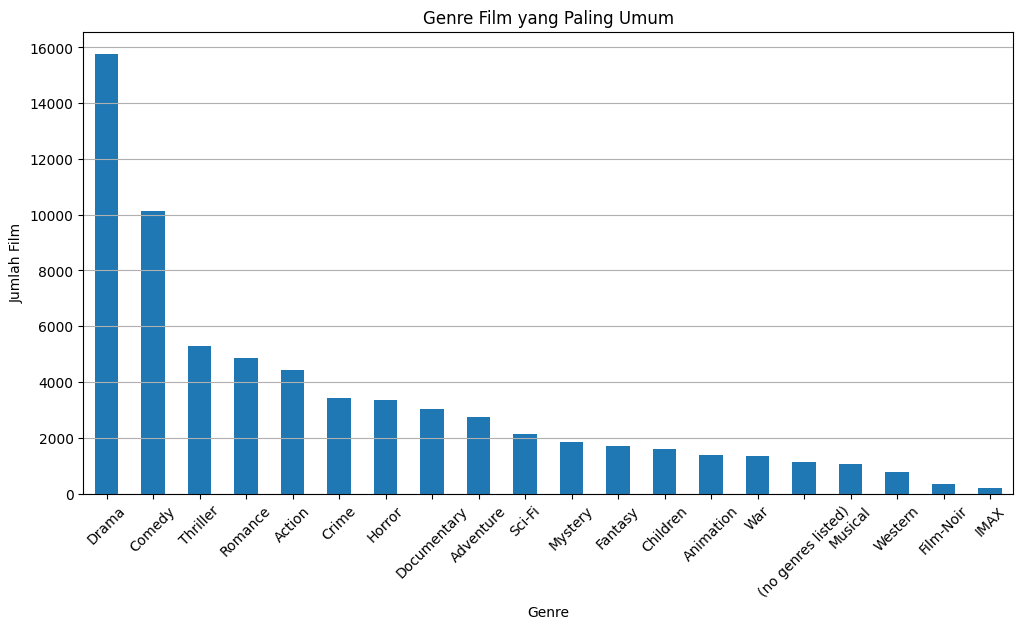

In [7]:
# Menghitung frekuensi setiap genre
genre_counts = movies['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)

# Membuat bar plot untuk genre yang paling umum
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Film yang Paling Umum')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [8]:
tags # kode ini akan melihat isi dari variabel tags yang sebelumnya kita baca menggunakan pd.read_csv

,userId,movieId,tag,timestamp
0,19,2324,bittersweet,1428651158
1,19,2324,holocaust,1428651112
2,19,2324,World War II,1428651118
3,23,7075,hilarious,1378675786
4,23,7075,Underrated,1378675786
...,...,...,...,...
586989,247751,96655,future,1366041126
586990,247751,96655,robots,1366041128
586991,247753,356,classic,1430438776
586992,247753,356,oscar (best supporting actor),1430438776


In [9]:
tags.info() # kode ini akan melihat detail dari variabel tags seperti tipe data dan sebagainya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586994 entries, 0 to 586993
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     586994 non-null  int64 
 1   movieId    586994 non-null  int64 
 2   tag        586978 non-null  object
 3   timestamp  586994 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 17.9+ MB


Kita memeriksa struktur dataset tags, termasuk tipe data dan jumlah film serta tag unik yang tersedia.

In [10]:
# kode ini ditujukan untuk melihat berapa movies pada dataset tags dengan jenis yang berbeda (duplikat tidak dihitung)
print('Banyak data movie: ', len(tags.movieId.unique()))

# melihat isi tags
print('Genre movie: ', tags.tag.unique())

Banyak data movie:  21654
Genre movie:  ['bittersweet' 'holocaust' 'World War II' ... 'creative monsters'
 'melodic soundtrack' 'great screenplays']


Kita membuat plot batang untuk memvisualisasikan frekuensi berbagai tag film. Ini membantu kita memahami tag mana yang paling populer di antara pengguna dan dapat memberikan wawasan untuk rekomendasi yang lebih baik.

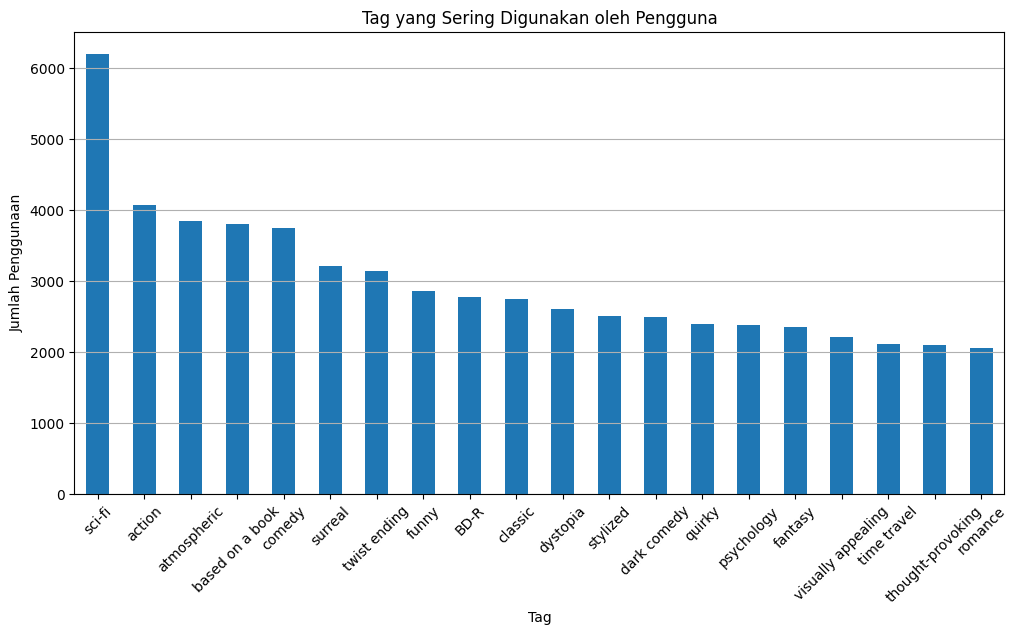

In [11]:
# Menghitung frekuensi setiap tag
tag_counts = tags['tag'].value_counts().head(20)  # Mengambil 20 tag teratas

# Membuat bar plot untuk tag yang paling sering digunakan
plt.figure(figsize=(12, 6))
tag_counts.plot(kind='bar')
plt.title('Tag yang Sering Digunakan oleh Pengguna')
plt.xlabel('Tag')
plt.ylabel('Jumlah Penggunaan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [12]:
links # kode ini akan melihat isi dari variabel links yang sebelumnya kita baca menggunakan pd.read_csv

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
34203,151697,62636,76851.0
34204,151701,1773315,235450.0
34205,151703,1507355,58500.0
34206,151709,2436672,365065.0


In [13]:
links.info() # kode ini akan melihat detail dari variabel links seperti tipe data dan sebagainya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  34208 non-null  int64  
 1   imdbId   34208 non-null  int64  
 2   tmdbId   33912 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 801.9 KB


Kita memeriksa struktur dataset links, termasuk tipe data dan jumlah film serta link unik yang tersedia.

In [14]:
# kode ini ditujukan untuk melihat berapa movies pada dataset links dengan jenis yang berbeda (duplikat tidak dihitung)
print('Banyak data movie: ', len(links.movieId.unique()))

# Melihat isi link movie
print('Link movie pada imdb: ', links.imdbId.unique())

Banyak data movie:  34208
Link movie pada imdb:  [ 114709  113497  113228 ... 1507355 2436672  388667]


In [15]:
ratings # kode ini akan melihat isi dari variabel ratings yang sebelumnya kita baca menggunakan pd.read_csv

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496
...,...,...,...,...
22884372,247753,49530,5.0,1430437962
22884373,247753,69481,3.0,1430437984
22884374,247753,74458,4.0,1430437968
22884375,247753,76093,5.0,1430437811


In [16]:
ratings.info() # kode ini akan melihat detail dari variabel ratings seperti tipe data dan sebagainya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22884377 entries, 0 to 22884376
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 698.4 MB


Kita memeriksa struktur dataset ratings, termasuk tipe data dan jumlah film serta rating unik yang tersedia.

In [17]:
# Menunjukkan jumlah film yang dievaluasi atau jumlah film yang diberi rating
print('Banyak data movie: ', len(ratings.movieId.unique()))

# Memeriksa jumlah pengguna yang melakukan ulasan atau memeriksa jumlah pengguna yang memberi rating setidaknya satu film
print('Jumlah pengguna yang melakukan ulasan: ', len(ratings['userId'].unique()))

# Melihat isi dari rating, nilai minimum dan maksimum
print('Ratings movie: ', ratings.rating.unique())

Banyak data movie:  33670
Jumlah pengguna yang melakukan ulasan:  247753
Ratings movie:  [2.5 3.  5.  3.5 4.  2.  1.  4.5 1.5 0.5]


Kita membuat histogram untuk memvisualisasikan distribusi rating film yang diberikan oleh pengguna. Dengan menggunakan sns.histplot(), histogram ini menunjukkan frekuensi setiap rating dalam rentang 1 hingga 5, dengan penambahan kurva distribusi (KDE) untuk memberikan gambaran yang lebih halus tentang sebaran data. Visualisasi ini sangat berguna untuk memahami bagaimana pengguna memberikan rating kepada film, serta mengidentifikasi pola atau kecenderungan dalam penilaian.

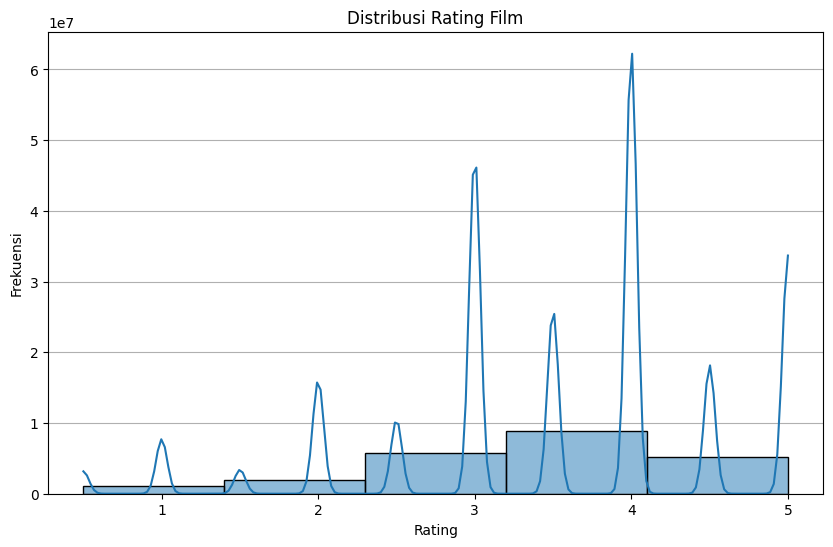

In [18]:
# Membuat histogram distribusi rating
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=5, kde=True)  # kde=True menambahkan kurva distribusi
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.xticks(range(1, 6))  # Mengatur label sumbu x
plt.grid(axis='y')
plt.show()

pada tahap ini saya menjalankan kode untuk melihat apakah ada nilai null pada dataset dataset, movies,tags,links, dan ratings dan jika ada maka nilai null akan dihapus

In [19]:
movies.isnull().any() # digunakan untuk memeriksa apakah ada nilai yang hilang (missing values) dalam DataFrame movies.

,0
movieId,False
title,False
genres,False


In [20]:
tags.isnull().any() # digunakan untuk memeriksa apakah ada nilai yang hilang (missing values) dalam DataFrame tags.

,0
userId,False
movieId,False
tag,True
timestamp,False


In [21]:
links.isnull().any() # digunakan untuk memeriksa apakah ada nilai yang hilang (missing values) dalam DataFrame links.

,0
movieId,False
imdbId,False
tmdbId,True


In [22]:
ratings.isnull().any() # digunakan untuk memeriksa apakah ada nilai yang hilang (missing values) dalam DataFrame ratings.

,0
userId,False
movieId,False
rating,False
timestamp,False


pada tahap ini saya menjalankan kode untuk melihat apakah ada duplikat pada dataset dataset, movies,tags,links, dan ratings dan jika ada maka nilai duplikat akan dihapus

In [23]:
# Memeriksa apakah ada duplikat
duplicates_exist = movies.duplicated().any()
print(f"Apakah ada duplikat dalam DataFrame movies? {duplicates_exist}")

Apakah ada duplikat dalam DataFrame movies? False


In [24]:
# Memeriksa apakah ada duplikat
duplicates_exist = ratings.duplicated().any()
print(f"Apakah ada duplikat dalam DataFrame ratings? {duplicates_exist}")

Apakah ada duplikat dalam DataFrame ratings? False


In [25]:
# Memeriksa apakah ada duplikat
duplicates_exist = tags.duplicated().any()
print(f"Apakah ada duplikat dalam DataFrame tags? {duplicates_exist}")

Apakah ada duplikat dalam DataFrame tags? False


In [26]:
# Memeriksa apakah ada duplikat
duplicates_exist = links.duplicated().any()
print(f"Apakah ada duplikat dalam DataFrame links? {duplicates_exist}")

Apakah ada duplikat dalam DataFrame links? False


# Content Based Filtering

## 1. Data Preparation untuk rekomendasi Content Based Filtering

pada tahap sebelumnya kita telah mengecek nilai null dan data duplikat, dan terdapat nilai null sedangkan data duplikat tidak ditemukan, oleh karena itu kita akan menghapus nilai null pada tiap tiap dataset

In [27]:
# Menghapus semua baris dengan nilai null dari masing-masing DataFrame
movies_cleaned = movies.dropna()
tags_cleaned = tags.dropna()
links_cleaned = links.dropna()
ratings_cleaned = ratings.dropna()

# Menampilkan jumlah baris sebelum dan sesudah pembersihan
print(f"Jumlah baris movies sebelum: {len(movies)} setelah: {len(movies_cleaned)}")
print(f"Jumlah baris tags sebelum: {len(tags)} setelah: {len(tags_cleaned)}")
print(f"Jumlah baris links sebelum: {len(links)} setelah: {len(links_cleaned)}")
print(f"Jumlah baris ratings sebelum: {len(ratings)} setelah: {len(ratings_cleaned)}")

Jumlah baris movies sebelum: 34208 setelah: 34208
Jumlah baris tags sebelum: 586994 setelah: 586978
Jumlah baris links sebelum: 34208 setelah: 33912
Jumlah baris ratings sebelum: 22884377 setelah: 22884377


Disini kita menggabungkan dataset movies dan tags untuk memudahkan kita membuat atau melatih model pada content based filtering

In [28]:
#Membaca kumpulan data tag:
#Bergabung dengan kumpulan data film dan tag:
movies_content=pd.merge(movies, tags, on='movieId')

#Memeriksa:
movies_content

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,261,animation,1313154708
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,261,fun,1313154717
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,716,animation,1428239638
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,716,children,1428239638
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,716,toys,1428239638
...,...,...,...,...,...,...
586989,151677,Last Hippie Standing (2002),(no genres listed),132513,nudity,1453951859
586990,151677,Last Hippie Standing (2002),(no genres listed),132513,spirituality,1453951836
586991,151677,Last Hippie Standing (2002),(no genres listed),132513,trippy,1453951839
586992,151677,Last Hippie Standing (2002),(no genres listed),132513,Yogi,1453951834


Disini kita menghapus kolom timestamp dan userId karena kolom ini tidak akan digunakan dalam pembuatan mode

In [29]:
# Menghapus kolom 'timestamp' dan 'userId':
movies_content.drop(['timestamp', 'userId'], axis=1, inplace=True)

# Memeriksa:
movies_content

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,animation
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,animation
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,children
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,toys
...,...,...,...,...
586989,151677,Last Hippie Standing (2002),(no genres listed),nudity
586990,151677,Last Hippie Standing (2002),(no genres listed),spirituality
586991,151677,Last Hippie Standing (2002),(no genres listed),trippy
586992,151677,Last Hippie Standing (2002),(no genres listed),Yogi


Kita melakukan pengelompokkan tag untuk setiap film dengan cara mengelompokkan data berdasarkan movieId, title, dan genres. Dalam langkah ini, kita menggunakan fungsi groupby() untuk mengatur film berdasarkan ID, judul, dan genre, lalu menerapkan fungsi apply(list) untuk menggabungkan semua tag yang terkait dengan setiap film ke dalam bentuk list. Hasil dari operasi ini adalah sebuah dataframe yang menyajikan setiap film dengan tag-tag yang telah dikelompokkan.

In [30]:
# Mengelompokkan tag untuk setiap film:
movies_content=movies_content.groupby(['movieId', 'title', 'genres'])['tag'].apply(list)

# Memeriksa
movies_content=pd.DataFrame(movies_content)
movies_content.reset_index(inplace=True)
movies_content

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[animation, fun, animation, children, toys, it..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[itaege, fantasy, time travel, Children, kid f..."
2,3,Grumpier Old Men (1995),Comedy|Romance,"[sequel, Funniest Movies, moldy, old, CLV, Jac..."
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[chick flick, revenge, CLV, characters, girl m..."
4,5,Father of the Bride Part II (1995),Comedy,"[humorous, steve martin, Diane Keaton, family,..."
...,...,...,...,...
21649,151567,The War in Space (1977),Action|Adventure|Sci-Fi,"[aliens, hostile aliens, space travel, Venus, ..."
21650,151599,Capital C (2015),Documentary,"[crowd funding, Documentary, inspirational]"
21651,151621,Looking for Grace (2015),Drama,"[Australia, Couple relations, Family relations..."
21652,151677,Last Hippie Standing (2002),(no genres listed),"[dance, drugs, India, music, nudity, spiritual..."


Disini kita mendefinisikan fungsi untuk mengubah variabel menjadi string

In [31]:
#Fungsi untuk mengubah variabel menjadi string:
def string_tag(tag):
    tag=str(tag)
    return tag

Setelah mengelompokkan tag untuk setiap film, langkah berikutnya adalah mengubah isi dari kolom tag dan genres menjadi format string. Proses ini dilakukan dengan menerapkan fungsi yang telah didefinisikan sebelumnya, yaitu string_tag(), yang dirancang untuk mengonversi daftar (list) menjadi representasi string yang lebih mudah dibaca. Dengan menggunakan apply(), kita menerapkan fungsi ini pada setiap elemen di kolom tag dan genres.

In [32]:
# Mengubah isi dari kolom tag dan genres menjadi string dengan fungsi yang didefinisikan sebelumnya
movies_content['tag']=movies_content['tag'].apply(string_tag)
movies_content['genres']=movies_content['genres'].apply(string_tag)

# Memeriksa
movies_content

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"['animation', 'fun', 'animation', 'children', ..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,"['itaege', 'fantasy', 'time travel', 'Children..."
2,3,Grumpier Old Men (1995),Comedy|Romance,"['sequel', 'Funniest Movies', 'moldy', 'old', ..."
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"['chick flick', 'revenge', 'CLV', 'characters'..."
4,5,Father of the Bride Part II (1995),Comedy,"['humorous', 'steve martin', 'Diane Keaton', '..."
...,...,...,...,...
21649,151567,The War in Space (1977),Action|Adventure|Sci-Fi,"['aliens', 'hostile aliens', 'space travel', '..."
21650,151599,Capital C (2015),Documentary,"['crowd funding', 'Documentary', 'inspirational']"
21651,151621,Looking for Grace (2015),Drama,"['Australia', 'Couple relations', 'Family rela..."
21652,151677,Last Hippie Standing (2002),(no genres listed),"['dance', 'drugs', 'India', 'music', 'nudity',..."


Setelah mengubah isi kolom tag dan genres menjadi string, langkah selanjutnya adalah membersihkan data dengan menghapus karakter khusus yang mungkin tidak diinginkan. Karakter khusus ini dapat mengganggu analisis data dan mengurangi kualitas pemrosesan dalam tahap selanjutnya. Untuk melakukan ini, kita menggunakan fungsi remove_special_characters() yang mungkin didefinisikan dalam modul nfx (kemungkinan besar merujuk pada library seperti nltk atau lainnya yang digunakan untuk pengolahan teks).

In [33]:
# Menghapus karakter khusus:
movies_content['tag']=movies_content['tag'].apply(nfx.remove_special_characters)
movies_content['genres']=movies_content['genres'].apply(nfx.remove_special_characters)

# Memeriksa
movies_content

,movieId,title,genres,tag
0,1,Toy Story (1995),AdventureAnimationChildrenComedyFantasy,animation fun animation children toys itaege a...
1,2,Jumanji (1995),AdventureChildrenFantasy,itaege fantasy time travel Children kid flick ...
2,3,Grumpier Old Men (1995),ComedyRomance,sequel Funniest Movies moldy old CLV Jack Lemm...
3,4,Waiting to Exhale (1995),ComedyDramaRomance,chick flick revenge CLV characters girl movie ...
4,5,Father of the Bride Part II (1995),Comedy,humorous steve martin Diane Keaton family sequ...
...,...,...,...,...
21649,151567,The War in Space (1977),ActionAdventureSciFi,aliens hostile aliens space travel Venus war
21650,151599,Capital C (2015),Documentary,crowd funding Documentary inspirational
21651,151621,Looking for Grace (2015),Drama,Australia Couple relations Family relations Mi...
21652,151677,Last Hippie Standing (2002),no genres listed,dance drugs India music nudity spirituality tr...


Tujuan dari langkah ini adalah untuk memastikan bahwa genre yang dituliskan dalam kolom tersebut terpisah dengan jelas, sehingga mudah dibaca dan dianalisis. Beberapa genre mungkin dituliskan tanpa spasi di antara kata-kata, misalnya "ActionAdventure" atau "RomanticComedy". Proses ini bertujuan untuk menambahkan spasi di antara kata-kata pada genre-genre tersebut.

In [34]:
# Menambahkan spasi antar genre
movies_content['genres'] = movies_content['genres'].str.replace(r"(?<!^)(?=[A-Z])", " ", regex=True).str.strip()

# Memeriksa
movies_content

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,animation fun animation children toys itaege a...
1,2,Jumanji (1995),Adventure Children Fantasy,itaege fantasy time travel Children kid flick ...
2,3,Grumpier Old Men (1995),Comedy Romance,sequel Funniest Movies moldy old CLV Jack Lemm...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,chick flick revenge CLV characters girl movie ...
4,5,Father of the Bride Part II (1995),Comedy,humorous steve martin Diane Keaton family sequ...
...,...,...,...,...
21649,151567,The War in Space (1977),Action Adventure Sci Fi,aliens hostile aliens space travel Venus war
21650,151599,Capital C (2015),Documentary,crowd funding Documentary inspirational
21651,151621,Looking for Grace (2015),Drama,Australia Couple relations Family relations Mi...
21652,151677,Last Hippie Standing (2002),no genres listed,dance drugs India music nudity spirituality tr...


Setelah membersihkan kolom tag dan genres dengan menghapus karakter khusus, langkah selanjutnya adalah membuat kolom baru yang bernama description_words. Kolom ini dirancang untuk menggabungkan semua informasi yang terdapat dalam kolom genres dan tag untuk setiap film, sehingga memberikan gambaran yang lebih komprehensif tentang karakteristik dan kategori film tersebut.

In [35]:
# Membuat kolom description_words yang berisi semua 'tag' dan 'genre':
movies_content['description_words']=movies_content['genres']+' '+movies_content['tag']

# Memeriksa
movies_content

,movieId,title,genres,tag,description_words
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,animation fun animation children toys itaege a...,Adventure Animation Children Comedy Fantasy an...
1,2,Jumanji (1995),Adventure Children Fantasy,itaege fantasy time travel Children kid flick ...,Adventure Children Fantasy itaege fantasy time...
2,3,Grumpier Old Men (1995),Comedy Romance,sequel Funniest Movies moldy old CLV Jack Lemm...,Comedy Romance sequel Funniest Movies moldy ol...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,chick flick revenge CLV characters girl movie ...,Comedy Drama Romance chick flick revenge CLV c...
4,5,Father of the Bride Part II (1995),Comedy,humorous steve martin Diane Keaton family sequ...,Comedy humorous steve martin Diane Keaton fami...
...,...,...,...,...,...
21649,151567,The War in Space (1977),Action Adventure Sci Fi,aliens hostile aliens space travel Venus war,Action Adventure Sci Fi aliens hostile aliens ...
21650,151599,Capital C (2015),Documentary,crowd funding Documentary inspirational,Documentary crowd funding Documentary inspirat...
21651,151621,Looking for Grace (2015),Drama,Australia Couple relations Family relations Mi...,Drama Australia Couple relations Family relati...
21652,151677,Last Hippie Standing (2002),no genres listed,dance drugs India music nudity spirituality tr...,no genres listed dance drugs India music nudit...


In [36]:
# Memeriksa kolom yang dibuat:
movies_content['description_words'].head()

,description_words
0,Adventure Animation Children Comedy Fantasy an...
1,Adventure Children Fantasy itaege fantasy time...
2,Comedy Romance sequel Funniest Movies moldy ol...
3,Comedy Drama Romance chick flick revenge CLV c...
4,Comedy humorous steve martin Diane Keaton fami...


In [37]:
# Memeriksa apakah ada nilai nol:
movies_content['description_words'].isnull().any()

False

## 2. Modeling untuk rekomendasi Content Based Filtering

Dalam analisis teks, salah satu langkah penting adalah mengubah bentuk teks menjadi representasi numerik yang dapat diproses lebih lanjut oleh algoritma pembelajaran mesin. Salah satu metode yang populer untuk tujuan ini adalah menggunakan teknik Term Frequency-Inverse Document Frequency (TF-IDF). TF-IDF adalah metode statistik yang digunakan untuk mengevaluasi seberapa penting sebuah kata dalam dokumen relatif terhadap kumpulan dokumen (corpus).

Pada tahap ini, kita melakukan inisiasi vektorizer TF-IDF dengan menggunakan TfidfVectorizer dari pustaka sklearn. Berikut adalah kodenya:

In [38]:
# Inisiasi vektorizer TF-IDF:
vectorizer=TfidfVectorizer(lowercase=True)

# Membuat matriks dari vektor kata deskripsi semua film:
tfidf_matrix=vectorizer.fit_transform(movies_content['description_words'])

# Memeriksa
tfidf_matrix

<21654x28343 sparse matrix of type '<class 'numpy.float64'>'
	with 383610 stored elements in Compressed Sparse Row format>

Setelah membangun representasi numerik dari teks dengan teknik TF-IDF, langkah selanjutnya adalah mengukur kesamaan antara dokumen-dokumen tersebut. Salah satu metode yang sering digunakan untuk mengukur kesamaan adalah cosine similarity. Cosine similarity mengukur seberapa mirip dua vektor dengan menghitung cosinus sudut di antara mereka. Nilai cosine similarity berkisar antara -1 hingga 1, di mana 1 berarti dokumen sempurna sama (atau searah), 0 berarti tidak memiliki kesamaan, dan -1 menunjukkan bahwa ada hubungan yang berlawanan (jika mempertimbangkan ruang vektor dengan kata-kata yang menunjukkan polaritas yang berbeda).

In [39]:
# Menghitung cosine similarity:
cos_sim=cosine_similarity(X=tfidf_matrix, Y=tfidf_matrix)

# Memeriksa
cos_sim

array([[1.        , 0.06184507, 0.0102074 , ..., 0.01598356, 0.        ,
        0.        ],
       [0.06184507, 1.        , 0.00142542, ..., 0.00271244, 0.        ,
        0.        ],
       [0.0102074 , 0.00142542, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01598356, 0.00271244, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.41737804],
       [0.        , 0.        , 0.        , ..., 0.        , 0.41737804,
        1.        ]])

Dalam pengolahan data dan analisis, terkadang kita perlu membuat struktur data yang memudahkan pencarian dan pengelompokan. Dalam contoh ini, kita akan membuat sebuah objek Series dari pustaka pandas yang memiliki indeks berupa judul film dan nilai berupa indeks numerik yang sesuai dari DataFrame movies_content. Ini memungkinkan kita untuk dengan mudah mengakses informasi berdasarkan judul film.

In [40]:
# Membuat serial yang indeksnya adalah judul filmnya dan nilainya adalah indeksnya masing-masing:
indices=pd.Series(movies_content.index, index=movies_content['title'])

# Memeriksa
indices

,0
title,
Toy Story (1995),0
Jumanji (1995),1
Grumpier Old Men (1995),2
Waiting to Exhale (1995),3
Father of the Bride Part II (1995),4
...,...
The War in Space (1977),21649
Capital C (2015),21650
Looking for Grace (2015),21651


Fungsi get_recommendation dirancang untuk memberikan rekomendasi film yang mungkin sesuai dengan selera penonton berdasarkan film yang telah ditonton sebelumnya. Fungsi ini menggunakan cosine similarity untuk menentukan seberapa mirip film satu dengan yang lain. Mari kita analisis kode yang diberikan:

In [41]:
# Mendefinisikan fungsi untuk mendapatkan rekomendasi berdasarkan film yang dikonsumsi:
def get_recommendation(judul_film, cos_sim=cos_sim):
    index = indices[judul_film]  # Mengambil indeks film yang dikonsumsi
    # Mendaftarkan skor kesamaan dari film yang dikonsumsi dan mengisolasinya dalam sebuah daftar:
    sim_scores = list(enumerate(cos_sim[index]))
    # Mengurutkan skor (dari yang tertinggi ke terendah):
    sim_scores = sorted(sim_scores, key=lambda X: X[1], reverse=True)
    # Memilih lima rekomendasi terbaik (kecuali film yang dikonsumsi sendiri):
    sim_scores = sim_scores[1:6]
    # Mengisolasi indeks dari film yang direkomendasikan:
    movie_indices = [i[0] for i in sim_scores]
    return movies_content['title'].iloc[movie_indices]  # Mengambil judul film yang direkomendasikan

Untuk mendapatkan rekomendasi film berdasarkan film "Free Willy 2: The Adventure Home (1995)", Anda akan menggunakan fungsi get_recommendation yang telah didefinisikan sebelumnya. begitupun untuk mendapatkan rekomendasi film yang lain

In [42]:
# Rekomendasi untuk 'Free Willy 2: The Adventure Home (1995)':
get_recommendation('Free Willy 2: The Adventure Home (1995)')

,title
835,"Shaggy Dog, The (1959)"
398,Free Willy (1993)
4672,Look Who's Talking Now (1993)
834,Homeward Bound: The Incredible Journey (1993)
21089,Noi 4 (2014)


In [43]:
# Rekomendasi untuk 'Toy Story (1995)':
get_recommendation('Toy Story (1995)')

,title
2623,Toy Story 2 (1999)
1935,"Bug's Life, A (1998)"
4171,"Monsters, Inc. (2001)"
13019,Toy Story 3 (2010)
5453,Finding Nemo (2003)


Kode ini melakukan hal berikut:

Mendefinisikan film-film relevan: Daftar relevant_movies berisi film-film yang dianggap relevan untuk direkomendasikan berdasarkan film "Toy Story (1995)".
Membuat fungsi rekomendasi: Fungsi get_recommendation mengembalikan daftar rekomendasi film berdasarkan film input. Dalam kasus ini, fungsi tersebut hanya memberikan rekomendasi untuk "Toy Story (1995)" dan tidak untuk film lain.
Menghitung metrik evaluasi: Kode ini menghitung beberapa metrik evaluasi standar untuk sistem rekomendasi:
Accuracy: Proporsi prediksi yang benar (baik benar positif maupun benar negatif).
Precision: Proporsi prediksi positif yang benar (seberapa banyak film yang direkomendasikan benar-benar relevan).
Recall: Proporsi kasus positif yang benar-benar diprediksi positif (seberapa banyak film relevan yang berhasil direkomendasikan).
F1-score: Rata-rata harmonik dari precision dan recall.
Kode ini kemudian mencetak metrik evaluasi yang dihitung.

Perlu dicatat bahwa sistem rekomendasi ini sangat sederhana dan hanya berfungsi untuk film "Toy Story (1995)". Kode ini menunjukkan bagaimana menghitung metrik evaluasi,

In [70]:
relevant_movies = [
    'Toy Story (1995)',
    "A Bug's Life (1998)",
    'Monsters, Inc. (2001)',
    'Toy Story 3 (2010)',
    'Finding Nemo (2003)'
]

def get_recommendation(movie_title):
    if movie_title == 'Toy Story (1995)':
        return [
            'Toy Story 2 (1999)',
            "A Bug's Life (1998)",
            'Monsters, Inc. (2001)',
            'Toy Story 3 (2010)',
            'Finding Nemo (2003)',
        ]
    else:
        return []

# Mendapatkan rekomendasi untuk film tertentu
recommended_movies = get_recommendation('Toy Story (1995)')

# Menghitung True Positives (TP) dan False Positives (FP)
TP = len(set(recommended_movies).intersection(set(relevant_movies)))
FP = len(set(recommended_movies) - set(relevant_movies))

# Menghitung True Negatives (TN) dan False Negatives (FN)
TN = len(set(['Toy Story 2 (1999)', 'Cars (2006)']) - set(relevant_movies))
FN = len(set(relevant_movies) - set(recommended_movies))

# Menghitung Precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0

# Menghitung Recall
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Menghitung Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0

# Menghitung F1-score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F 1-score: {f1_score:.2f}')

Accuracy: 0.75
Precision: 0.80
Recall: 0.80
F 1-score: 0.80


# Item Based Collaborative Filtering

## 1. Data Preparation untuk rekomendasi Item Based Collaborative Filtering

Untuk menerapkan item-based filtering pada dataset film, Anda perlu memiliki data yang sesuai serta beberapa langkah dasar. Anda sepertinya telah membaca file CSV yang berisi data film menggunakan pandas dan ingin memeriksa data tersebut. Mari kita lihat bagaimana Anda dapat melakukannya secara keseluruhan, dimulai dari pembacaan file hingga pemeriksaan data.

In [45]:
movies=pd.read_csv('/content/movies.csv').head(500)

# Memeriksa
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
495,499,Mr. Wonderful (1993),Comedy|Romance
496,500,Mrs. Doubtfire (1993),Comedy|Drama
497,501,Naked (1993),Drama
498,502,"Next Karate Kid, The (1994)",Action|Children|Romance


Setelah Anda menggabungkan dataset antara ratings dan movies menggunakan fungsi pd.merge, langkah berikut adalah untuk memeriksa hasil penggabungan tersebut. Penggabungan dataset ini memungkinkan Anda untuk mengaitkan informasi pengguna (ratings) dengan informasi film (judul, genre, dll), yang sangat berguna untuk analisis lebih lanjut seperti membuat rekomendasi film.

In [46]:

# Menggabungkan dataset antara 'ratings' dan 'movie'
data=pd.merge(ratings, movies, on='movieId', how='inner')

# Memeriksa
data

,userId,movieId,rating,timestamp,title,genres
0,1,169,2.5,1204927694,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama
1,3,356,4.0,920587155,Forrest Gump (1994),Comedy|Drama|Romance|War
2,4,16,4.0,1037740142,Casino (1995),Crime|Drama
3,4,39,4.0,1037740562,Clueless (1995),Comedy|Romance
4,4,45,4.0,1037808019,To Die For (1995),Comedy|Drama|Thriller
...,...,...,...,...,...,...
3721815,247751,480,4.0,1365452653,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
3721816,247753,1,3.0,1430437796,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3721817,247753,318,5.0,1430437699,"Shawshank Redemption, The (1994)",Crime|Drama
3721818,247753,356,5.0,1430437654,Forrest Gump (1994),Comedy|Drama|Romance|War


#Memeriksa apakah ada nilai yang hilang
data.isnull().any()

In [47]:
#Memeriksa apakah ada nilai yang hilang
data.isnull().any()

,0
userId,False
movieId,False
rating,False
timestamp,False
title,False
genres,False


Menghapus kolom yang tidak dibutuhkan adalah langkah penting dalam membersihkan dataset sebelum melakukan analisis lebih lanjut. Dengan menghapus kolom seperti timestamp, movieId, dan genres, Anda berfokus pada kolom yang lebih relevan dengan analisis yang akan dilakukan.

In [48]:
# Menghapus kolom yang tidak dibutuhkan
data.drop(['timestamp', 'movieId', 'genres'], axis=1, inplace=True)

# Memeriksa
data

,userId,rating,title
0,1,2.5,Free Willy 2: The Adventure Home (1995)
1,3,4.0,Forrest Gump (1994)
2,4,4.0,Casino (1995)
3,4,4.0,Clueless (1995)
4,4,4.0,To Die For (1995)
...,...,...,...
3721815,247751,4.0,Jurassic Park (1993)
3721816,247753,3.0,Toy Story (1995)
3721817,247753,5.0,"Shawshank Redemption, The (1994)"
3721818,247753,5.0,Forrest Gump (1994)


Membuat pivot table adalah cara yang efektif untuk mengorganisir dan menganalisis data dengan lebih baik, terutama ketika Anda ingin melihat hubungan antara dua variabel. Dalam kasus Anda, Anda membuat pivot table menggunakan title sebagai indeks, userId sebagai kolom, dan rating sebagai nilai.

In [49]:
# Membuat Pivot
data=data.pivot(index='title', columns='userId', values='rating')

# Memeriksa
data

userId,1,3,4,6,7,8,9,10,11,12,...,247741,247742,247745,247746,247747,247748,247749,247750,247751,247753
title,,,,,,,,,,,,,,,,,,,,,
8 Seconds (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Above the Rim (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ace Ventura: Pet Detective (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ace Ventura: When Nature Calls (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Across the Sea of Time (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
With Honors (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wolf (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mengisi nilai NaN dengan 0 adalah langkah yang sering dilakukan, terutama dalam konteks analisis data rating, di mana Anda ingin memastikan bahwa tidak ada nilai kosong yang dapat mempengaruhi analisis lebih lanjut. Dengan mengisi NaN dengan 0, Anda menunjukkan bahwa pengguna tidak memberikan rating untuk film tertentu.

In [50]:
# Mengisi nilai nan dengan 0
data=data.fillna(0)

# Memeriksa
data

userId,1,3,4,6,7,8,9,10,11,12,...,247741,247742,247745,247746,247747,247748,247749,247750,247751,247753
title,,,,,,,,,,,,,,,,,,,,,
8 Seconds (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Above the Rim (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ace Ventura: Pet Detective (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ace Ventura: When Nature Calls (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Across the Sea of Time (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
With Honors (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wolf (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Membagi data menjadi data pelatihan dan data pengujian adalah langkah penting dalam machine learning, yang memungkinkan Anda untuk melatih model pada satu bagian dari data dan mengujinya pada bagian lain untuk melihat seberapa baik performanya. Dalam konteks data rating seperti pada contoh Anda, memisahkan data dengan benar sangat penting untuk mendapatkan hasil yang dapat dipercaya.

In [51]:
# Membagi data menjadi data pelatihan dan data pengujian
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# Mengubah data pelatihan dan pengujian menjadi matriks sparse
train_sparse = csr_matrix(train_data)
test_sparse = csr_matrix(test_data)

## 2. Modeling untuk rekomendasi Item Based Collaborative Filtering

Membangun dan melatih model rekomendasi menggunakan algoritma K-Nearest Neighbors (KNN) dengan metrik jarak kosinus adalah langkah yang populer untuk sistem rekomendasi, terutama ketika Anda bekerja dengan data berbasis pengguna dan item seperti rating film.

In [52]:
# Membuat dan Melatih Model
model = NearestNeighbors(n_neighbors=5,metric='cosine', algorithm='brute')
model.fit(train_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

Fungsi yang Anda buat untuk menampilkan rekomendasi film berdasarkan index film tertentu terlihat sangat baik. Fungsi ini mencari tetangga terdekat menggunakan model K-Nearest Neighbors yang telah dilatih sebelumnya, dan menampilkan rekomendasi lengkap dengan jarak antara film yang direkomendasikan dan film yang diminta.

In [53]:
# Mengambil rekomendasi dan jarak untuk film tertentu
def display_recommendations(movie_index):
    distances, suggestions = model.kneighbors(data.iloc[movie_index, :].values.reshape(1, -1))

    # Membuat DataFrame untuk jarak dan judul film yang direkomendasikan
    recommendations = pd.DataFrame({
        'Title': data.index[suggestions.flatten()],
        'Distance': distances.flatten()
    })

    # Menyaring rekomendasi untuk menghindari film yang sama
    recommendations = recommendations[recommendations['Title'] != data.index[movie_index]]

    # Menampilkan judul film yang direkomendasikan
    print(f'Rekomendasi untuk film: "{data.index[movie_index]}"')
    print(recommendations)

Ketika Anda menjalankan display_recommendations(2), fungsi tersebut akan memberikan rekomendasi film berdasarkan film yang terletak di indeks 2 dalam DataFrame data. Fungsi ini akan melakukan beberapa langkah yang telah dijelaskan sebelumnya untuk mendapatkan dan menampilkan rekomendasi.

In [54]:
display_recommendations(2)

Rekomendasi untuk film: "Ace Ventura: Pet Detective (1994)"
                                       Title  Distance
0                       Boxing Helena (1993)  0.309421
1              Miracle on 34th Street (1994)  0.378249
2  Lawnmower Man 2: Beyond Cyberspace (1996)  0.400886
3                          Carrington (1995)  0.407813
4             Steal Big, Steal Little (1995)  0.410505


In [55]:
display_recommendations(32)

Rekomendasi untuk film: "Batman Forever (1995)"
                                       Title  Distance
0              Miracle on 34th Street (1994)  0.000000
1  Lawnmower Man 2: Beyond Cyberspace (1996)  0.368499
2                          Carrington (1995)  0.377028
3                           Coneheads (1993)  0.412355
4                               Blink (1994)  0.419229


In [56]:
display_recommendations(64)

Rekomendasi untuk film: "Braveheart (1995)"
                             Title  Distance
0                     Nadja (1994)  0.000000
1                  Maverick (1994)  0.397529
2                   Go Fish (1994)  0.409203
3  Manhattan Murder Mystery (1993)  0.410622
4          Man of the House (1995)  0.437779


In [57]:
display_recommendations(32)

Rekomendasi untuk film: "Batman Forever (1995)"
                                       Title  Distance
0              Miracle on 34th Street (1994)  0.000000
1  Lawnmower Man 2: Beyond Cyberspace (1996)  0.368499
2                          Carrington (1995)  0.377028
3                           Coneheads (1993)  0.412355
4                               Blink (1994)  0.419229


Dalam kode yang Anda berikan, Anda sedang membuat fungsi predict_ratings untuk memprediksi rating film menggunakan model K-Nearest Neighbors (KNN). Fungsi ini mengambil model KNN dan dua DataFrame (test_data dan train_data), serta mengembalikan prediksi rating berdasarkan film yang ada di test_data.

In [58]:
# Fungsi untuk membuat prediksi
def predict_ratings(model, test_data, train_data):
    predictions = []
    for title in test_data.index:
        # Mendapatkan rating untuk film yang ada di test_data
        test_row = test_sparse[test_data.index.get_loc(title)].toarray().reshape(1, -1)

        # Mencari tetangga terdekat
        distances, indices = model.kneighbors(test_row, n_neighbors=5)

        # Menghitung rata-rata rating berdasarkan neighbor
        neighbor_ratings = train_data.iloc[indices.flatten()].mean(axis=0)

        # Mengambil rating dari film yang sama di test_data
        actual_ratings = test_data.loc[title]

        # Menyimpan prediksi
        predictions.append(neighbor_ratings)

    return np.array(predictions)

# Membuat prediksi
predictions = predict_ratings(model, test_data, train_data)

# Menghitung MAE
mae = mean_absolute_error(test_data.values.flatten(), predictions.flatten())

# Menampilkan hasil evaluasi
print(f"Evaluate the model on 10000 test data ...\n")
print(f"MAE : {mae}\n{mae}")

Evaluate the model on 10000 test data ...

MAE : 0.20173630200422316
0.20173630200422316


# User-based collaborative filtering

## 1. Data Preparation untuk rekomendasi User Based Collaborative Filtering

Transposisi matriks dalam konteks sistem rekomendasi dilakukan untuk mempermudah analisis berdasarkan bagaimana pengguna atau item saling berinteraksi. Terlepas dari pendekatan yang digunakan (user-based filtering atau item-based filtering), transposisi memungkinkan kita untuk mengubah perspektif dari data yang ada.

In [59]:
# Transposisi matriks:
data_transposed=data.transpose()

# Memeriksa
data_transposed

title,8 Seconds (1994),Above the Rim (1994),Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),"Addiction, The (1995)","Adventures of Priscilla, Queen of the Desert, The (1994)","Age of Innocence, The (1993)","Air Up There, The (1994)",...,White Man's Burden (1995),White Squall (1996),Widows' Peak (1994),Wild Bill (1995),Wings of Courage (1995),With Honors (1994),Wolf (1994),"Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)",Wyatt Earp (1994),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dalam sistem rekomendasi, membagi data menjadi data pelatihan (training data) dan data pengujian (test data) adalah langkah penting untuk mengevaluasi dan mengukur efektivitas rekomendasi.

In [60]:
# Membagi data menjadi data pelatihan dan data pengujian
train_data_transpose, test_data_transpose = train_test_split(data_transposed, test_size=0.2, random_state=42)

# Mengubah data pelatihan dan pengujian menjadi matriks sparse
train_sparse_transpose = csr_matrix(train_data_transpose)
test_sparse_stranspose = csr_matrix(test_data_transpose)

## 2. Modeling untuk rekomendasi uSER Based Collaborative Filtering

Dalam sistem rekomendasi berbasis item, langkah berikutnya setelah membagi data menjadi data pelatihan dan pengujian adalah untuk membuat dan melatih model. Pada contoh yang Anda berikan, Anda menggunakan algoritma Nearest Neighbors untuk mendapatkan rekomendasi berdasarkan kesamaan cosine.

In [61]:
# Membuat dan Melatih Model
model = NearestNeighbors(n_neighbors=5, metric='cosine', algorithm='brute')
model.fit(train_sparse_transpose)

NearestNeighbors(algorithm='brute', metric='cosine')

Fungsi yang Anda buat untuk memberikan rekomendasi film berdasarkan user-based filtering menggunakan model Nearest Neighbors sangat berguna dalam konteks sistem rekomendasi.

In [62]:
def display_user_based_recommendations(user_index, n_recommendations=10):
    # Validasi user_index
    if user_index < 0 or user_index >= train_sparse_transpose.shape[0]:
        print(f"Index {user_index} out of bounds for users with size {train_sparse_transpose.shape[0]}")
        return

    # Mengambil rekomendasi menggunakan nearest neighbors
    distances, suggestions = model.kneighbors(train_sparse_transpose[user_index].reshape(1, -1))

    # Mengambil pengguna yang terdekat (kecuali pengguna itu sendiri)
    similar_users = suggestions.flatten()[1:]

    # Mengambil film yang telah ditonton oleh pengguna yang mirip tetapi belum ditonton oleh pengguna yang target
    recommended_movies = pd.Series(dtype='float64')

    for similar_user in similar_users:
        user_movies = train_data_transpose.iloc[similar_user]
        user_movies_watched = user_movies[user_movies > 0].index

        # Menggunakan pd.concat() untuk menggabungkan series
        recommended_movies = pd.concat([recommended_movies, pd.Series(user_movies_watched)])

    # Menyaring untuk film yang belum ditonton oleh pengguna target
    watched_movies = train_data_transpose.iloc[user_index][train_data_transpose.iloc[user_index] > 0].index
    recommended_movies = recommended_movies[~recommended_movies.isin(watched_movies)]

    # Menghitung frekuensi rekomendasi film
    recommended_movies = recommended_movies.value_counts().reset_index()
    recommended_movies.columns = ['Title', 'Score']

    # Menampilkan judul film yang direkomendasikan
    print(recommended_movies.head(n_recommendations))

Ketika Anda memanggil fungsi display_user_based_recommendations(6), Anda akan meminta program untuk memberikan rekomendasi film untuk pengguna dengan indeks 3. begitupun dengan dengan rekomendasi untuk pengguna dengan indeks lainnya

In [63]:
display_user_based_recommendations(3) # rekomendasi untuk user dengan index 3

                                               Title  Score
0                                   Apollo 13 (1995)      4
1                                Crimson Tide (1995)      4
2                                   GoldenEye (1995)      4
3                                   Quiz Show (1994)      4
4  Interview with the Vampire: The Vampire Chroni...      3
5              Ace Ventura: When Nature Calls (1995)      3
6                              Lion King, The (1994)      3
7                                        Babe (1995)      2
8                     While You Were Sleeping (1995)      2
9                                  Disclosure (1994)      1


In [64]:
display_user_based_recommendations(23)

                                   Title  Score
0                  Mrs. Doubtfire (1993)      4
1                       Mask, The (1994)      4
2                       GoldenEye (1995)      3
3            Natural Born Killers (1994)      3
4                         Ed Wood (1994)      3
5                      Waterworld (1995)      3
6  Ace Ventura: When Nature Calls (1995)      3
7                  Batman Forever (1995)      3
8                     Judge Dredd (1995)      2
9             In the Line of Fire (1993)      2


In [65]:
display_user_based_recommendations(54)

                                Title  Score
0                   Braveheart (1995)      2
1                    True Lies (1994)      2
2         Addams Family Values (1993)      1
3               Batman Forever (1995)      1
4        Beverly Hills Cop III (1994)      1
5                  Cliffhanger (1993)      1
6                    Coneheads (1993)      1
7                        Congo (1995)      1
8                    Firm, The (1993)      1
9  Four Weddings and a Funeral (1994)      1


In [66]:
# Menampilkan daftar pustaka yang terinstal
!pip freeze

absl-py==1.4.0
accelerate==0.34.2
aiohappyeyeballs==2.4.3
aiohttp==3.10.10
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.4
astropy-iers-data==0.2024.10.28.0.34.7
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.25.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1